In [3]:
import pandas as pd


In [2]:
import random
import requests

def sample_books(book_urls, Author_name,book_name):
    # Create a list to store the DataFrames
    dataframes = []
    # Iterate over the book URLs and labels
    for url, label, title in zip(book_urls, Author_name,book_name):
        # Download book from Gutenberg
        book = requests.get(url)
        book = book.text
        # Split book into a list of words
        words = book.split()
        # Create a list to store the partitions
        partitions = []
        # Use a for loop to sample 200 partitions of 150 words each
        for i in range(200):
            start_index = random.randint(0, len(words) - 150)
            partition = words[start_index : start_index + 150]
            partitions.append(" ".join(partition))
        # Create a Pandas DataFrame to store the partitions
        data = {'text': partitions,'author': [label]*200,'book':title}
        df = pd.DataFrame(data)
        # Append the DataFrame to the list
        dataframes.append(df)
    # Concatenate the DataFrames into a single DataFrame
    final_df = pd.concat(dataframes)
    #return dataframe
    return final_df



In [5]:
book_urls = ['https://www.gutenberg.org/files/145/145-0.txt', 'https://www.gutenberg.org/files/14255/14255-8.txt','https://www.gutenberg.org/files/16807/16807-8.txt','https://www.gutenberg.org/files/20289/20289-8.txt','https://www.gutenberg.org/files/17699/17699-8.txt']
Author_name = ['George Eliot', 'Arnold Haultain','Grant Allen', 'Reuel L. Howe','Emil Lucka']
book_name = ['Middlemarch', 'Hints for Lovers','Falling in Love','Herein is Love','The Evolution of Love']
df = sample_books(book_urls, Author_name,book_name)
df.to_csv('text_data.csv',index=False)
# Load the data into a pandas dataframe
df = pd.read_csv("text_data.csv")
# Preprocess the data
df['text'] = df['text'].str.lower() # Convert to lowercase
df['text'] = df['text'].str.replace('[^a-zA-Z0-9\s]','') # Remove punctuation

C:\Users\joshr\AppData\Local\Temp\ipykernel_11504\332279380.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^a-zA-Z0-9\s]','') # Remove punctuation


In [6]:
# Split the data into training, validation, and testing sets
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
# Transform the data into bag-of-words representation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = CountVectorizer()
train_matrix = vectorizer.fit_transform(train_df['text'])
test_matrix = vectorizer.transform(test_df['text'])


## BaseLine Classifiers

### Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier
DST_Model = DecisionTreeClassifier()
DST_Model.fit(train_matrix,train_df['author'])
Cross_score_DST = cross_val_score(DST_Model,test_matrix,test_df['author'],cv=10)
DST_Score = DST_Model.score(test_matrix,test_df['author'])
DST_y_pred = DST_Model.predict(test_matrix)
print(DST_Score)

0.72


### SVM

In [8]:
from sklearn.svm import SVC
SVM_Model = SVC()
SVM_Model.fit(train_matrix,train_df['author'])
Cross_score_SVM = cross_val_score(SVM_Model,test_matrix,test_df['author'],cv=10)
SVM_Score = SVM_Model.score(test_matrix,test_df['author'])
SVM_y_pred = SVM_Model.predict(test_matrix)
print(SVM_Score)

0.885


### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
LogiReg_Model = LogisticRegression()
LogiReg_Model.fit(train_matrix,train_df['author'])
Cross_score_LogiReg = cross_val_score(LogiReg_Model,test_matrix,test_df['author'],cv=10)
LogiReg_Score = LogiReg_Model.score(test_matrix,test_df['author'])
LogiReg_y_pred = LogiReg_Model.predict(test_matrix)
print(LogiReg_Score)

e:\Softwares\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
e:\Softwares\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

0.91


e:\Softwares\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(train_matrix,train_df['author'])
Cross_score_KNN = cross_val_score(KNN_Model,test_matrix,test_df['author'],cv=10)
KNN_Score = KNN_Model.score(test_matrix,test_df['author'])
KNN_y_pred = KNN_Model.predict(test_matrix)
print(KNN_Score)

0.77


### Naive Bayes

In [11]:
from sklearn.naive_bayes import MultinomialNB
NB_Model = MultinomialNB()
NB_Model.fit(train_matrix,train_df['author'])
Cross_score_NB = cross_val_score(NB_Model,test_matrix,test_df['author'],cv=10)
NB_Score = NB_Model.score(test_matrix,test_df['author'])
NB_y_pred = NB_Model.predict(test_matrix)
print(NB_Score)

0.955


### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
RF_Model = RandomForestClassifier()
RF_Model.fit(train_matrix,train_df['author'])
Cross_score_RF = cross_val_score(RF_Model,test_matrix,test_df['author'],cv=10)
RF_Score = RF_Model.score(test_matrix,test_df['author'])
RF_y_pred = RF_Model.predict(test_matrix)
print(RF_Score)

0.905


## Cross validation Score

In [13]:
Model_list = [DST_Model,KNN_Model,SVM_Model,NB_Model,RF_Model,LogiReg_Model]
Model_accurcies = [DST_Score,KNN_Score,SVM_Score,NB_Score,RF_Score,LogiReg_Score]

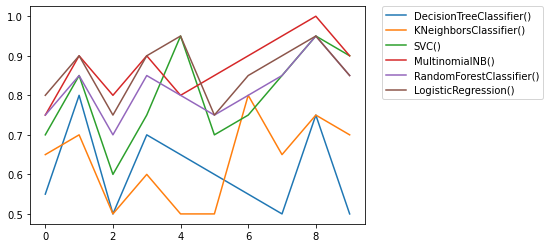

In [14]:
plt.plot(Cross_score_DST)
plt.plot(Cross_score_KNN)
plt.plot(Cross_score_SVM)
plt.plot(Cross_score_NB)
plt.plot(Cross_score_RF)
plt.plot(Cross_score_LogiReg)
plt.legend(Model_list,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

## Confusion Matrix

Confusion matrix for DecisionTreeClassifier()
Classification Report: 
                  precision    recall  f1-score   support

Arnold Haultain       0.83      0.83      0.83        48
     Emil Lucka       0.71      0.45      0.56        44
   George Eliot       0.74      0.79      0.76        33
    Grant Allen       0.62      0.76      0.68        37
  Reuel L. Howe       0.68      0.79      0.73        38

       accuracy                           0.72       200
      macro avg       0.72      0.72      0.71       200
   weighted avg       0.72      0.72      0.71       200



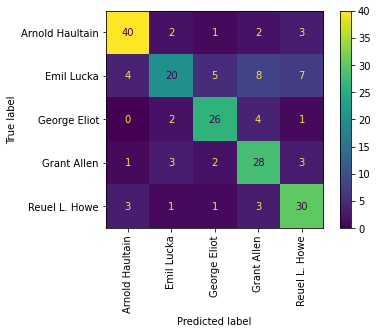

In [15]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
print('Confusion matrix for',Model_list[0])
Model = Model_list[0]
ConfusionMatrixDisplay.from_estimator(Model,test_matrix,test_df['author'],xticks_rotation='vertical')

# using classification report to have a have detailed breakdown of performance
cr = classification_report(test_df['author'], DST_y_pred)
print("Classification Report: \n", cr)

Confusion matrix for KNeighborsClassifier()
Classification Report: 
                  precision    recall  f1-score   support

Arnold Haultain       0.77      0.83      0.80        48
     Emil Lucka       0.77      0.77      0.77        44
   George Eliot       0.77      0.91      0.83        33
    Grant Allen       0.76      0.70      0.73        37
  Reuel L. Howe       0.77      0.63      0.70        38

       accuracy                           0.77       200
      macro avg       0.77      0.77      0.77       200
   weighted avg       0.77      0.77      0.77       200



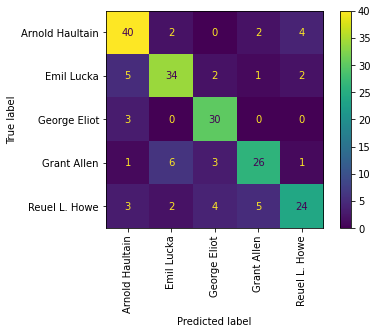

In [16]:
print('Confusion matrix for',Model_list[1])
Model = Model_list[1]
ConfusionMatrixDisplay.from_estimator(Model,test_matrix,test_df['author'],xticks_rotation='vertical')
cr = classification_report(test_df['author'], KNN_y_pred)
print("Classification Report: \n", cr)

Confusion matrix for SVC()
Classification Report: 
                  precision    recall  f1-score   support

Arnold Haultain       0.88      0.90      0.89        48
     Emil Lucka       0.95      0.82      0.88        44
   George Eliot       0.97      0.85      0.90        33
    Grant Allen       0.88      0.97      0.92        37
  Reuel L. Howe       0.79      0.89      0.84        38

       accuracy                           0.89       200
      macro avg       0.89      0.89      0.89       200
   weighted avg       0.89      0.89      0.89       200



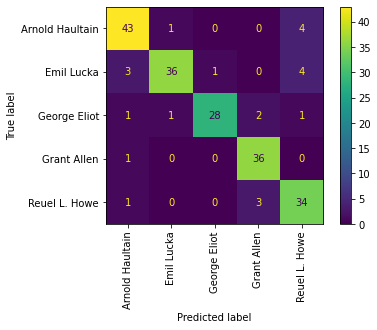

In [17]:
print('Confusion matrix for',Model_list[2])
Model = Model_list[2]
ConfusionMatrixDisplay.from_estimator(Model,test_matrix,test_df['author'],xticks_rotation='vertical')
cr = classification_report(test_df['author'], SVM_y_pred)
print("Classification Report: \n", cr)

Confusion matrix for MultinomialNB()
Classification Report: 
                  precision    recall  f1-score   support

Arnold Haultain       0.96      0.92      0.94        48
     Emil Lucka       1.00      0.93      0.96        44
   George Eliot       1.00      0.97      0.98        33
    Grant Allen       1.00      0.97      0.99        37
  Reuel L. Howe       0.84      1.00      0.92        38

       accuracy                           0.95       200
      macro avg       0.96      0.96      0.96       200
   weighted avg       0.96      0.95      0.96       200



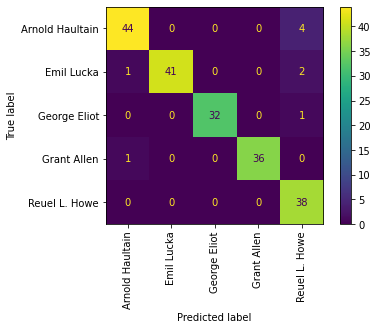

In [18]:
print('Confusion matrix for',Model_list[3])
Model = Model_list[3]
ConfusionMatrixDisplay.from_estimator(Model,test_matrix,test_df['author'],xticks_rotation='vertical')
cr = classification_report(test_df['author'], NB_y_pred)
print("Classification Report: \n", cr)

Confusion matrix for RandomForestClassifier()
Classification Report: 
                  precision    recall  f1-score   support

Arnold Haultain       0.93      0.90      0.91        48
     Emil Lucka       0.92      0.82      0.87        44
   George Eliot       0.94      0.97      0.96        33
    Grant Allen       0.92      0.95      0.93        37
  Reuel L. Howe       0.81      0.92      0.86        38

       accuracy                           0.91       200
      macro avg       0.91      0.91      0.91       200
   weighted avg       0.91      0.91      0.90       200



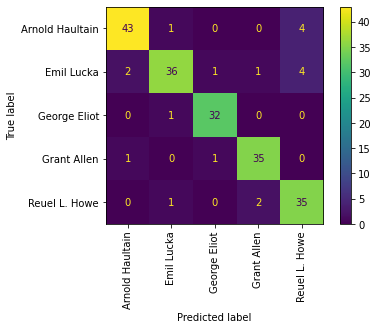

In [19]:
print('Confusion matrix for',Model_list[4])
Model = Model_list[4]
ConfusionMatrixDisplay.from_estimator(Model,test_matrix,test_df['author'],xticks_rotation='vertical')
cr = classification_report(test_df['author'], RF_y_pred)
print("Classification Report: \n", cr)

Confusion matrix LogisticRegression()
Classification Report: 
                  precision    recall  f1-score   support

Arnold Haultain       0.93      0.90      0.91        48
     Emil Lucka       0.93      0.84      0.88        44
   George Eliot       1.00      0.91      0.95        33
    Grant Allen       0.95      0.97      0.96        37
  Reuel L. Howe       0.78      0.95      0.86        38

       accuracy                           0.91       200
      macro avg       0.92      0.91      0.91       200
   weighted avg       0.92      0.91      0.91       200



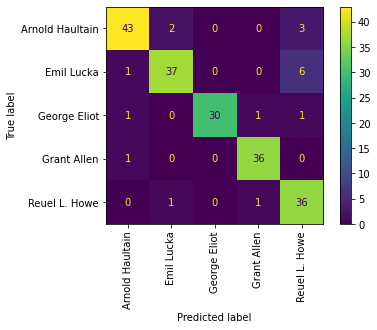

In [20]:
print('Confusion matrix',Model_list[5])
Model = Model_list[5]
ConfusionMatrixDisplay.from_estimator(Model,test_matrix,test_df['author'],xticks_rotation='vertical')
cr = classification_report(test_df['author'], LogiReg_y_pred)
print("Classification Report: \n", cr)

## Accuracy Comparision

<BarContainer object of 6 artists>

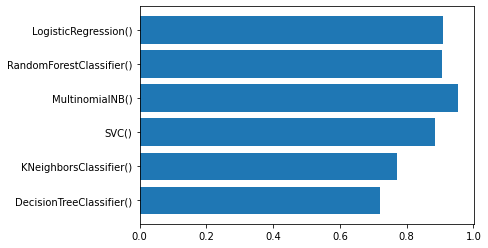

In [21]:
model_names = [str(model) for model in Model_list]
plt.barh(model_names,Model_accurcies)

## Hyperparameter tuning

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.1, 1, 10, 100]}


grid_search = GridSearchCV(NB_Model, param_grid, cv=5)


grid_search.fit(train_matrix,train_df['author'])

# get the best hyperparameters and the best score
print('Best hyperparameters: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best hyperparameters:  {'alpha': 0.1}
Best score:  0.96875


### Effect of alpha on the accuracy of naive bayes

### Maximum accuracy

In [23]:
from sklearn.naive_bayes import MultinomialNB
NB_Model = MultinomialNB(alpha=grid_search.best_params_['alpha'])
NB_Model.fit(train_matrix,train_df['author'])
Cross_score_NB = cross_val_score(NB_Model,test_matrix,test_df['author'],cv=10)
NB_Score = NB_Model.score(test_matrix,test_df['author'])
print(NB_Score)

0.965


### Minimum Accuracy

In [24]:
NB_Model = MultinomialNB(alpha=10000000)
NB_Model.fit(train_matrix,train_df['author'])
Cross_score_NB = cross_val_score(NB_Model,test_matrix,test_df['author'],cv=10)
NB_Score = NB_Model.score(test_matrix,test_df['author'])
print(NB_Score)

0.165


### Accuracy Curve for the Alpha values

In [25]:
score={}
for i in np.linspace(0.0001,100,1000):
    NB_Model = MultinomialNB(alpha=i)
    NB_Model.fit(train_matrix,train_df['author'])
    Cross_score_NB = cross_val_score(NB_Model,test_matrix,test_df['author'],cv=10)
    NB_Score = NB_Model.score(test_matrix,test_df['author'])
    score[float(i)]=NB_Score

In [ ]:
plt.plot(score.keys(), score.values())

### Deeper analysis of accuracy curve 

In [ ]:
score={}
for i in np.linspace(0.001,2,1000):
    NB_Model = MultinomialNB(alpha=i)
    NB_Model.fit(train_matrix,train_df['author'])
    Cross_score_NB = cross_val_score(NB_Model,test_matrix,test_df['author'],cv=10)
    NB_Score = NB_Model.score(test_matrix,test_df['author'])
    score[float(i)]=NB_Score

In [ ]:
plt.plot(score.keys(), score.values())